### **Make Connection Between Python and SQL Server**

In [1]:
import pyodbc
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"  
    "SERVER=MEHRDAD;"
    "DATABASE=Games;" 
    "Trusted_Connection=yes;"  
)

connection = pyodbc.connect(conn_str)

### **More insights about Query 1: Most Expensive Games**

In [ ]:
# Convert query to dataframe

query = """
SELECT
    VG.Genre, PL.NickName, SUM(PR.Price) AS "Total Price"
FROM [dbo].[VideoGames] VG
    JOIN [dbo].[Price] PR ON VG.GameID = PR.GameID
    JOIN [dbo].[Purchase_Games] PG ON PG.GameID = VG.GameID
    JOIN [dbo].[Players] PL ON PL.PlayerID = PG.PlayerID
GROUP BY VG.Genre, PL.NickName
ORDER BY SUM(PR.Price) DESC
"""

df = pd.read_sql(query, connection)

In [ ]:
# Look at dataframe
df

,Genre,NickName,Total Price
0,Visual Novel,Unsocial_Shadow,11720.63
1,Adventure,diabolvs_pl,11363.63
2,Adventure,BwhoUwannaB,9874.34
3,Adventure,fograid,9607.52
4,Adventure,Koenig_Arne,9482.68
...,...,...,...
2626193,Puzzle | Platformer,PATA_333_AR,0.98
2626194,First Person Shooter | Platformer,OfficerGigaChad,0.98
2626195,Visual Novel,Spyderskorpian,0.98
2626196,Third Person Shooter,noWay_Matth,0.98


Now, we see top 10 genres based on price in a bar chart

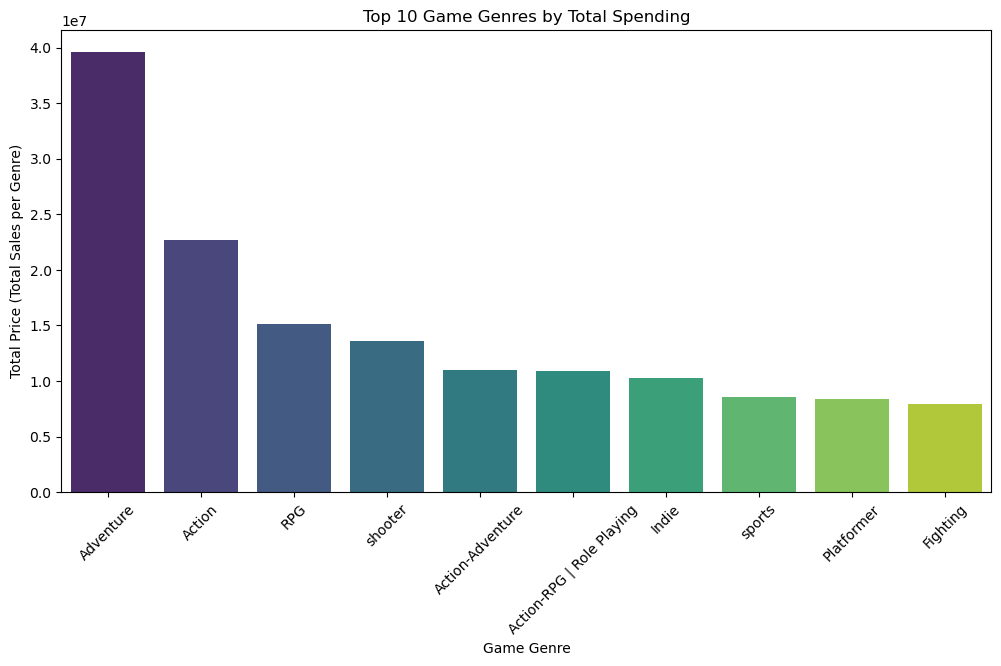

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_genre_price = df.groupby("Genre", as_index=False)["Total Price"].sum()
df_top10 = df_genre_price.sort_values(by="Total Price", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10, x="Genre", y="Total Price", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Game Genre")
plt.ylabel("Total Price (Total Sales per Genre)")
plt.title("Top 10 Game Genres by Total Spending")
plt.show()


Now, we can test whether there is any relationship between genre and price or not.

In [8]:
from scipy.stats import f_oneway

genre_groups = [df[df["Genre"] == g]["Total Price"] for g in df["Genre"].unique()]
stat, p_value = f_oneway(*genre_groups)

print("ANOVA Test p-value:", p_value)

ANOVA Test p-value: 0.0


Since, p-value is less than 0.05, we reject H0 and it means genre impact and price are related to each other.

<hr>